In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
import matplotlib.font_manager as fm

#한글 깨짐 방지
fm.fontManager.addfont(fm.findSystemFonts(fontpaths='/content/drive/MyDrive/Colab Notebooks/font')[0])

### 2020년 운동, 건강 키워드 

In [4]:
df_keyword =  pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project/DataSet/건강_운동_키워드_2020.csv', encoding='cp949')
df_keyword.head()

,일자,건강,운동
0,2020-01-05,43,40
1,2020-01-12,46,32
2,2020-01-19,41,37
3,2020-01-26,53,37
4,2020-02-02,58,38


In [5]:
df_keyword.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   일자      52 non-null     object
 1   건강      52 non-null     int64 
 2   운동      52 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.3+ KB


In [8]:
df_keyword.shape

(52, 3)

### 월별 키워드 검색 수

In [11]:
df_keyword['Mon'] = df_keyword['일자'].apply(lambda x : x[5:7])

In [16]:
df_keyword_m = df_keyword[['Mon','건강','운동']].groupby(by='Mon').sum().sort_index().reset_index()
df_keyword_m

,Mon,건강,운동
0,01,183,146
1,02,200,148
2,03,316,219
3,04,269,225
4,05,338,308
5,06,237,234
6,07,211,185
7,08,277,216
8,09,218,176
9,10,225,186


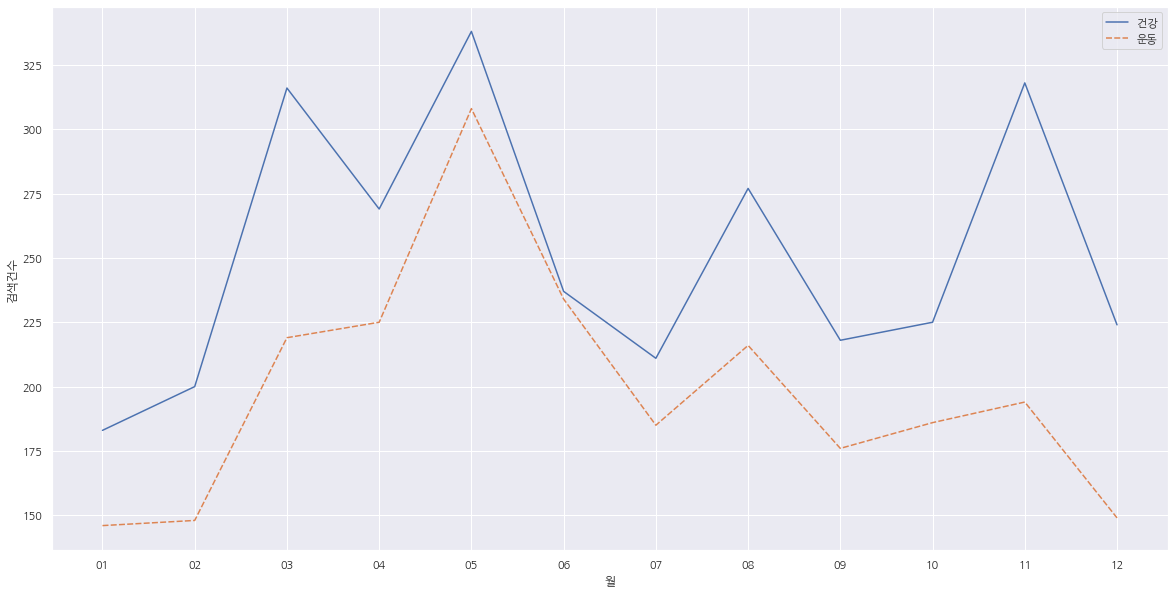

In [23]:
sns.set(font ='NanumGothicOTF',
        rc={"axes.unicode_minus":False},
        style='darkgrid')

fig, ax = plt.subplots(figsize=(20,10))
ax = sns.lineplot(data=df_keyword_m)
ax.set(xlabel='월',ylabel='검색건수')
ax.set_xticks(range(len(df_keyword_m)))
ax.set_xticklabels(['01','02','03','04','05','06','07','08','09','10','11','12'])
plt.show()

- 코로나 확진 수와 비교

In [39]:
df_corona = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project/DataSet/코로나바이러스감염증-19_확진환자_발생현황.csv', encoding='cp949')

In [40]:
df_corona.shape

(712, 20)

In [41]:
df_corona.head()

,일자,계(명),서울,부산,대구,인천,광주,대전,울산,세종,경기,강원,충북,충남,전북,전남,경북,경남,제주,검역
0,누적(명),"625,967","223,567","24,815","22,992","36,418","7,941","12,179","6,833","2,125","184,887","12,333","11,424","17,958","9,469","6,018","15,210","20,447","4,622","6,729"
1,2020-01-20,1,-,-,-,1,-,-,-,-,-,-,-,-,-,-,-,-,-,-
2,2020-01-21,0,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
3,2020-01-22,0,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
4,2020-01-23,0,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-


In [49]:
#전국 통계
df_corona_kor = df_corona[['일자','계(명)']].rename(columns={'일자':'date','계(명)':'cnt'})
#누적 삭제
df_corona_kor.drop(0, inplace=True)

In [53]:
df_corona_kor.reset_index(drop=True, inplace=True)

In [79]:
#년, 월추가
df_corona_kor['mon'] = df_corona_kor['date'].apply(lambda x:x[5:7])
df_corona_kor['year'] = df_corona_kor['date'].apply(lambda x:x[0:4])
df_corona_kor

,date,cnt,mon,year
0,2020-01-20,1,01,2020
1,2020-01-21,0,01,2020
2,2020-01-22,0,01,2020
3,2020-01-23,0,01,2020
4,2020-01-24,1,01,2020
...,...,...,...,...
706,2021-12-26,5416,12,2021
707,2021-12-27,4205,12,2021
708,2021-12-28,3865,12,2021
709,2021-12-29,5408,12,2021


In [70]:
df_corona_kor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 711 entries, 0 to 710
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    711 non-null    object
 1   cnt     711 non-null    object
 2   mon     711 non-null    object
dtypes: object(3)
memory usage: 16.8+ KB


In [76]:
# , 치환 후 type 변경
df_corona_kor['cnt'] = df_corona_kor['cnt'].replace('(.*),(.*)',r'\1\2', regex=True).astype('int64')

In [77]:
df_corona_kor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 711 entries, 0 to 710
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    711 non-null    object
 1   cnt     711 non-null    int64 
 2   mon     711 non-null    object
dtypes: int64(1), object(2)
memory usage: 16.8+ KB


In [92]:
df_corona_kor_m = df_corona_kor[['year','mon','cnt']].groupby(['year','mon']).sum().reset_index()
df_corona_kor_m

,year,mon,cnt
0,2020,01,11
1,2020,02,2920
2,2020,03,6855
3,2020,04,979
4,2020,05,703
5,2020,06,1331
6,2020,07,1506
7,2020,08,5641
8,2020,09,3865
9,2020,10,2700


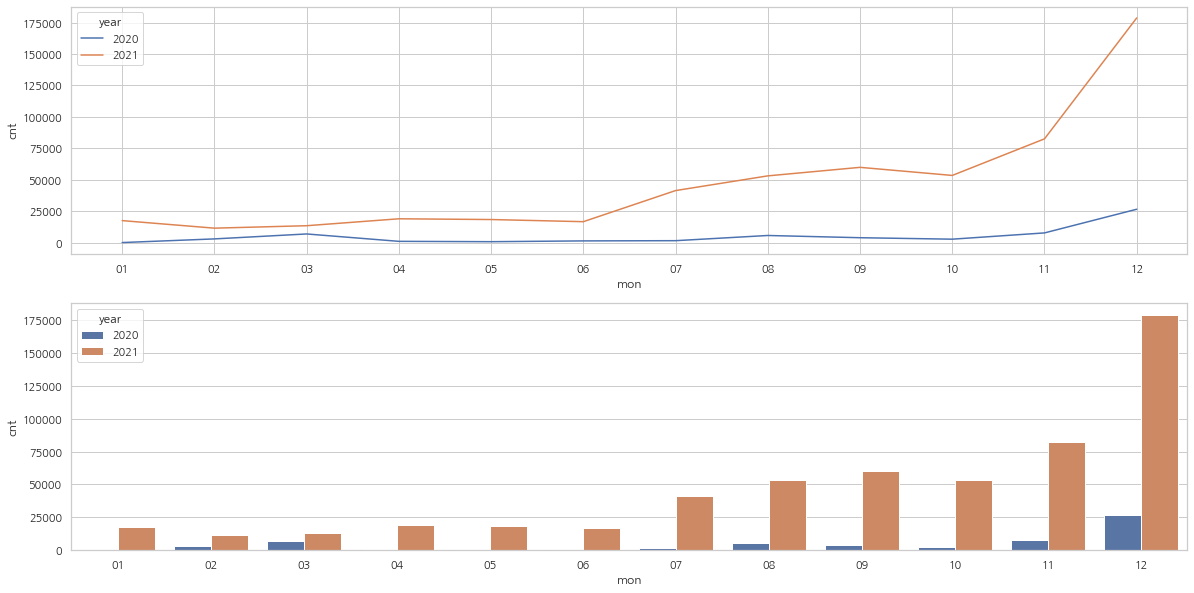

In [126]:
sns.set(font ='NanumGothicOTF',
        rc={"axes.unicode_minus":False},
        style='whitegrid')

fig, ax = plt.subplots(2,1,figsize=(20,10))
a = sns.lineplot(data=df_corona_kor_m, x='mon',y='cnt', hue='year', ax=ax[0])
a.set_xticks(range(12))
a.set_xticklabels(['01','02','03','04','05','06','07','08','09','10','11','12'])
b = sns.barplot(data=df_corona_kor_m, x='mon',y='cnt', hue='year', ax=ax[1])
plt.show()

In [107]:
#서울시만
df_corona_seoul = df_corona[['일자','서울']].rename(columns={'일자':'date','서울':'cnt'})
df_corona_seoul

,date,cnt
0,누적(명),"223,567"
1,2020-01-20,-
2,2020-01-21,-
3,2020-01-22,-
4,2020-01-23,-
...,...,...
707,2021-12-26,"1,915"
708,2021-12-27,"1,496"
709,2021-12-28,"1,290"
710,2021-12-29,"1,914"


In [108]:
#년, 월추가
df_corona_seoul['mon'] = df_corona_seoul['date'].apply(lambda x:x[5:7])
df_corona_seoul['year'] = df_corona_seoul['date'].apply(lambda x:x[0:4])
df_corona_seoul

,date,cnt,mon,year
0,누적(명),"223,567",,누적(명
1,2020-01-20,-,01,2020
2,2020-01-21,-,01,2020
3,2020-01-22,-,01,2020
4,2020-01-23,-,01,2020
...,...,...,...,...
707,2021-12-26,"1,915",12,2021
708,2021-12-27,"1,496",12,2021
709,2021-12-28,"1,290",12,2021
710,2021-12-29,"1,914",12,2021


In [123]:
# , 치환 후 type 변경
df_corona_seoul.replace('-','0', inplace=True)
df_corona_seoul['cnt'] = df_corona_seoul['cnt'].replace('(.*),(.*)',r'\1\2', regex=True).astype('int64')
df_corona_seoul

,date,cnt,mon,year
1,2020-01-20,0,01,2020
2,2020-01-21,0,01,2020
3,2020-01-22,0,01,2020
4,2020-01-23,0,01,2020
5,2020-01-24,1,01,2020
...,...,...,...,...
707,2021-12-26,1915,12,2021
708,2021-12-27,1496,12,2021
709,2021-12-28,1290,12,2021
710,2021-12-29,1914,12,2021


In [117]:
#누적 row 삭제
df_corona_seoul.drop(0, inplace=True)

In [121]:
df_corona_seoul.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 711 entries, 1 to 711
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    711 non-null    object
 1   cnt     711 non-null    object
 2   mon     711 non-null    object
 3   year    711 non-null    object
dtypes: object(4)
memory usage: 27.8+ KB


In [125]:
df_corona_seoul_m = df_corona_seoul[['cnt','mon','year']].groupby(['year','mon']).sum().reset_index()
df_corona_seoul_m

,year,mon,cnt
0,2020,01,7
1,2020,02,67
2,2020,03,376
3,2020,04,183
4,2020,05,228
5,2020,06,451
6,2020,07,288
7,2020,08,2268
8,2020,09,1425
9,2020,10,718


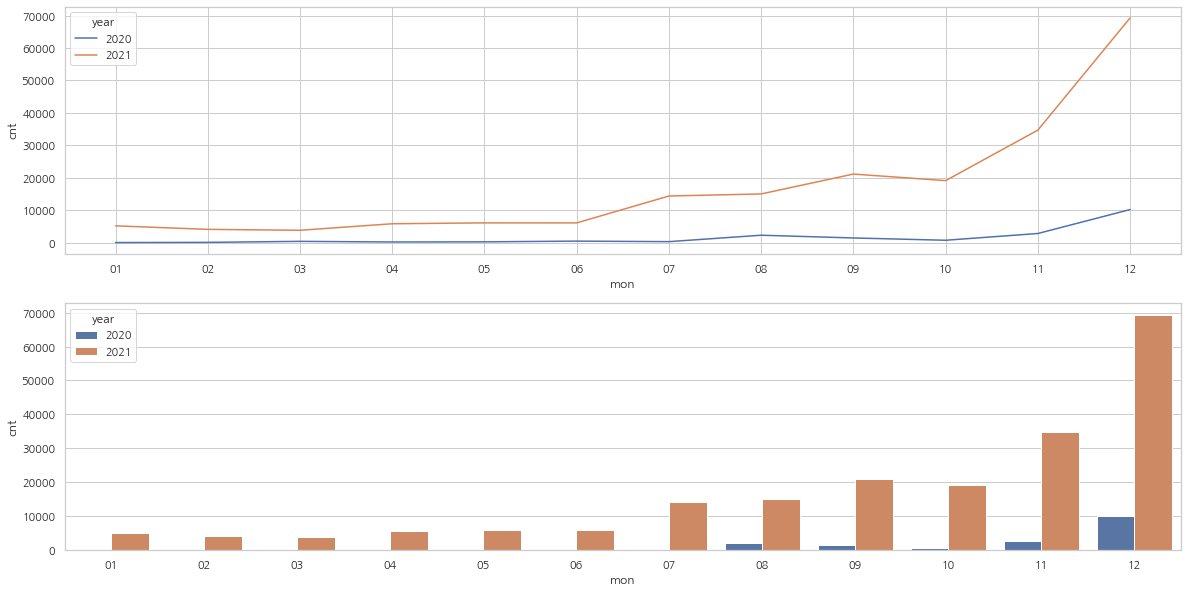

In [127]:
sns.set(font ='NanumGothicOTF',
        rc={"axes.unicode_minus":False},
        style='whitegrid')

fig, ax = plt.subplots(2,1,figsize=(20,10))
a = sns.lineplot(data=df_corona_seoul_m, x='mon',y='cnt', hue='year', ax=ax[0])
a.set_xticks(range(12))
a.set_xticklabels(['01','02','03','04','05','06','07','08','09','10','11','12'])
b = sns.barplot(data=df_corona_seoul_m, x='mon',y='cnt', hue='year', ax=ax[1])
plt.show()

In [ ]:
#검색 키워드와 코로나 확진자수 인과관계 알아보기

In [136]:
#키워드에 비해 확진자수가 월등히 많기 때문에 그 수를 줄여준다.
import math
df_corona_seoul_m['cnt_t'] = df_corona_seoul_m['cnt'].apply(lambda x: int(math.log(x)*30))
df_corona_seoul_m

,year,mon,cnt,cnt_t
0,2020,01,7,58
1,2020,02,67,126
2,2020,03,376,177
3,2020,04,183,156
4,2020,05,228,162
5,2020,06,451,183
6,2020,07,288,169
7,2020,08,2268,231
8,2020,09,1425,217
9,2020,10,718,197


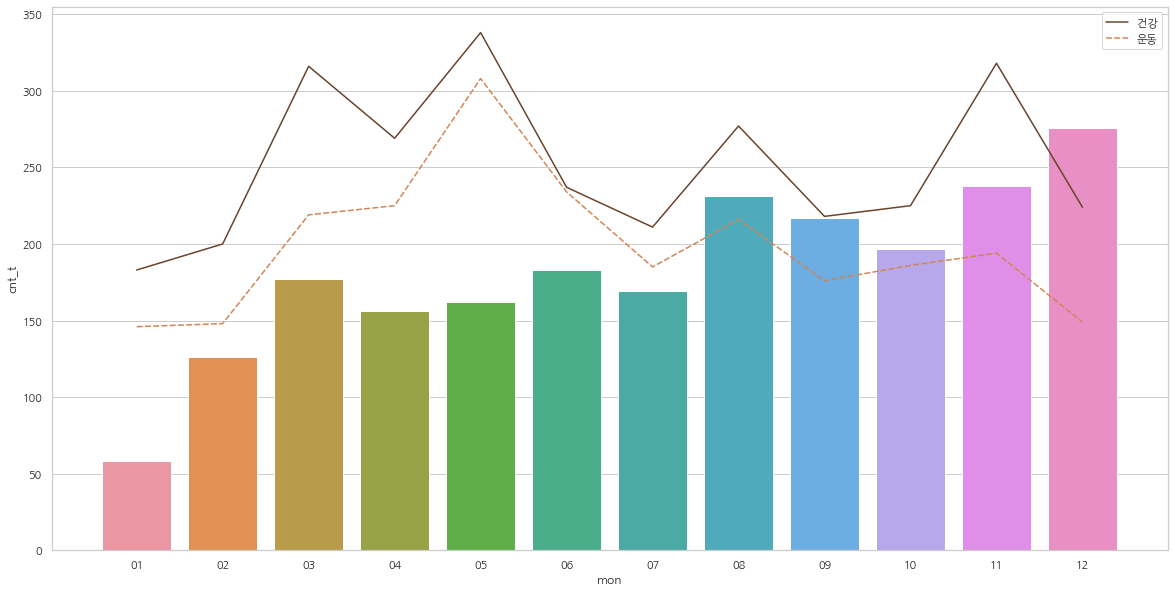

In [151]:
sns.set(font ='NanumGothicOTF',
        rc={"axes.unicode_minus":False},
        style='whitegrid')

fig, ax = plt.subplots(figsize=(20,10))
ax.set_xticks(range(12))
ax.set_xticklabels(['01','02','03','04','05','06','07','08','09','10','11','12'])
sns.barplot(data=df_corona_seoul_m[df_corona_seoul_m['year']=='2020'], x='mon',y='cnt_t')
sns.lineplot(data=df_keyword_m, palette='copper')

In [189]:
#서울시 운동장소 통계
df_loc = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Project/DataSet/서울시 주로 이용하는 운동 장소 통계.xls')
df_loc.head()

,기간,대분류,분류,공원 및 산 등의 산책로,민간상업 체육시설,학교체육시설,집에서 간단한 운동,지자체 및 공공기관운영 시설,직장내 체육시설,기타
0,2019,서울시,서울시,52.1,19.1,6.0,12.0,8.4,2.4,0.1
1,2019,성별,남자,52.3,21.6,7.4,9.7,5.7,3.2,0.1
2,2019,성별,여자,51.8,16.6,4.6,14.3,11.0,1.5,0.1
3,2019,연령별,10대,25.3,8.7,50.1,13.1,2.6,0.2,0
4,2019,연령별,20대,36.7,28.2,12.4,14.3,5.3,3.1,0


In [190]:
df_loc = df_loc.drop(['기간','대분류','분류'], axis=1).iloc[0,:].reset_index()

In [191]:
df_loc.head()

,index,0
0,공원 및 산 등의 산책로,52.1
1,민간상업 체육시설,19.1
2,학교체육시설,6
3,집에서 간단한 운동,12
4,지자체 및 공공기관운영 시설,8.4


In [193]:
df_loc.rename(columns={'index':'place',0:'result'}, inplace=True)
df_loc

,place,result
0,공원 및 산 등의 산책로,52.1
1,민간상업 체육시설,19.1
2,학교체육시설,6
3,집에서 간단한 운동,12
4,지자체 및 공공기관운영 시설,8.4
5,직장내 체육시설,2.4
6,기타,0.1


In [223]:
df_loc_t = df_loc.set_index('place').T
df_loc_t['기타'] = df_loc_t.iloc[0,1:-1].sum()
df_loc_t

place,공원 및 산 등의 산책로,민간상업 체육시설,학교체육시설,집에서 간단한 운동,지자체 및 공공기관운영 시설,직장내 체육시설,기타
result,52.1,19.1,6,12,8.4,2.4,47.9


In [225]:
# 필요한 컬럼만 가지고 오기 
df_loc_t = df_loc_t[['공원 및 산 등의 산책로','기타']]
df_loc_t = df_loc_t.T.reset_index()

In [226]:
df_loc_t

,place,result
0,공원 및 산 등의 산책로,52.1
1,기타,47.9


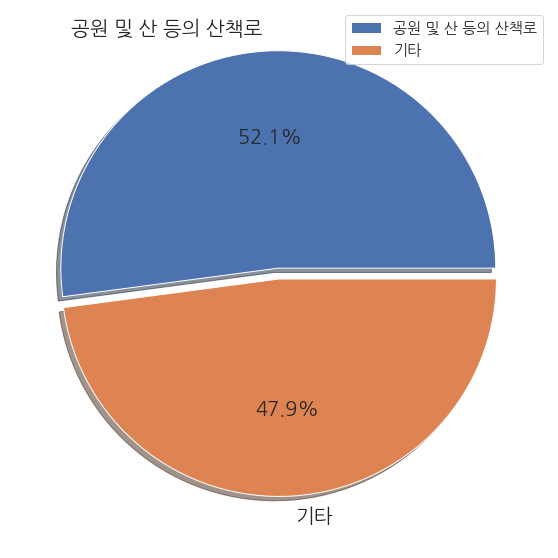

In [258]:
sns.set(font ='NanumGothicOTF',
        rc={"axes.unicode_minus":False},
        style='whitegrid')

fig, ax = plt.subplots(figsize=(25,10))

plt.pie(x='result',data=df_loc_t, explode=[0.05, 0], autopct='%1.1f%%',shadow=True, labels=['공원 및 산 등의 산책로','기타'], textprops={'fontsize':20})
plt.legend(fontsize=15)


In [261]:
df_weight = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project/DataSet/연간_체중조절_시도율.csv', encoding='cp949')
df_weight

,구분,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,서울,46.5,52.8,55.9,61.7,59.2,64.4,62.9,65.4,63.8,67.3,63.5,69.5,71.8
1,부산,41.9,46.3,49.0,58.6,53.6,61.7,61.1,57.7,60.1,66.1,62.0,64.1,68.2
2,대구,45.0,48.8,52.6,56.6,55.2,59.2,59.8,66.6,64.6,61.0,55.4,64.4,67.9
3,인천,40.0,51.0,51.1,58.5,55.0,61.1,62.8,66.5,62.4,64.6,63.9,66.0,68.6
4,광주,45.3,49.9,51.7,60.2,58.1,63.0,58.5,67.4,61.1,63.8,60.4,65.0,64.5
5,대전,38.7,48.0,53.3,66.0,54.3,64.6,60.5,64.3,60.2,67.1,66.3,69.8,69.6
6,울산,39.4,49.8,54.1,58.5,53.3,61.5,58.0,61.3,61.4,68.2,62.3,64.5,68.0
7,세종,.,.,.,.,53.4,59.3,56.4,58.9,63.3,68.8,60.7,66.3,63.9
8,경기,48.2,50.2,52.9,59.6,56.9,61.7,58.2,62.0,60.2,64.9,61.4,66.3,67.6
9,강원,39.8,47.4,52.9,57.2,51.1,60.6,60.8,64.8,58.5,64.1,63.7,64.0,65.9


In [262]:
df_weight_t = df_weight.set_index('구분').T
df_weight_t

구분,서울,부산,대구,인천,광주,대전,울산,세종,경기,강원,충북,충남,전북,전남,경북,경남,제주
2008,46.5,41.9,45.0,40.0,45.3,38.7,39.4,.,48.2,39.8,44.0,30.0,35.4,33.6,36.8,36.2,44.3
2009,52.8,46.3,48.8,51.0,49.9,48.0,49.8,.,50.2,47.4,45.8,40.5,37.3,39.2,42.3,43.6,40.8
2010,55.9,49.0,52.6,51.1,51.7,53.3,54.1,.,52.9,52.9,47.6,44.9,50.9,43.8,45.2,45.7,56.7
2011,61.7,58.6,56.6,58.5,60.2,66.0,58.5,.,59.6,57.2,57.3,49.8,55.3,53.6,51.6,52.0,57.7
2012,59.2,53.6,55.2,55,58.1,54.3,53.3,53.4,56.9,51.1,53,50.2,48.4,47.1,48.4,49.2,60.1
2013,64.4,61.7,59.2,61.1,63,64.6,61.5,59.3,61.7,60.6,58.9,58.7,55.4,52.4,54.9,56.7,65.3
2014,62.9,61.1,59.8,62.8,58.5,60.5,58,56.4,58.2,60.8,57.3,56.4,53.2,51.8,55.4,54.3,62
2015,65.4,57.7,66.6,66.5,67.4,64.3,61.3,58.9,62,64.8,58.2,57.1,53.8,57.5,59.8,61.4,70.5
2016,63.8,60.1,64.6,62.4,61.1,60.2,61.4,63.3,60.2,58.5,57.4,61.9,57.6,57,56.4,59.8,61.4
2017,67.3,66.1,61,64.6,63.8,67.1,68.2,68.8,64.9,64.1,60.7,64,61,62.2,59.8,61.5,54


In [263]:
df_weight_t['세종'] = df_weight_t['세종'].apply(lambda x : 0 if x =='.' else x )

In [265]:
df_weight_t= df_weight_t.astype('float64')
df_weight_t.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13 entries, 2008 to 2020
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   서울      13 non-null     float64
 1   부산      13 non-null     float64
 2   대구      13 non-null     float64
 3   인천      13 non-null     float64
 4   광주      13 non-null     float64
 5   대전      13 non-null     float64
 6   울산      13 non-null     float64
 7   세종      13 non-null     float64
 8   경기      13 non-null     float64
 9   강원      13 non-null     float64
 10  충북      13 non-null     float64
 11  충남      13 non-null     float64
 12  전북      13 non-null     float64
 13  전남      13 non-null     float64
 14  경북      13 non-null     float64
 15  경남      13 non-null     float64
 16  제주      13 non-null     float64
dtypes: float64(17)
memory usage: 1.8+ KB


In [270]:
#전국 19년도 20년도 
df_weight_corona = df_weight_t.T[['2018','2019','2020']]
df_weight_corona

,2018,2019,2020
구분,,,
서울,63.5,69.5,71.8
부산,62.0,64.1,68.2
대구,55.4,64.4,67.9
인천,63.9,66.0,68.6
광주,60.4,65.0,64.5
대전,66.3,69.8,69.6
울산,62.3,64.5,68.0
세종,60.7,66.3,63.9
경기,61.4,66.3,67.6


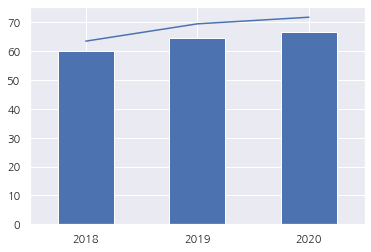

In [286]:
df_weight_corona.mean().plot(kind='bar')
df_weight_corona.iloc[0,:].plot(kind='line')